Property price Prediction(House price Estimation)

1.Problem Statement

                Property prices are influenced by multiple factors such as house size, location, age, and overall condition. Accurately estimating property prices is important for buyers, sellers, real estate companies, and financial institutions. Manual estimation often leads to incorrect pricing and poor decision-making.
                The objective of this project is to build a regression-based machine learning model to predict property prices using historical housing data and to identify the most important factors influencing house prices.

2.Objectives of the Project



*   Understand property price patterns

*   Perform basic data preprocessing
*   Conduct minimal but meaningful Exploratory Data Analysis (EDA)


*  Build regression-based machine learning models

*   Evaluate model performance using regression metrics
*   Identify key price-influencing features





In [2]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [3]:
import pandas as pd
df=pd.read_csv("train.csv")
#df.head()#reading 1st 5 rows
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [10]:
df.shape

(1460, 81)

In [11]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1455,False
1456,False
1457,False
1458,False


In [12]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


4.Exploratory Data Analysis(EDA)-Minimal Graphs

Graph 1:Price prediction

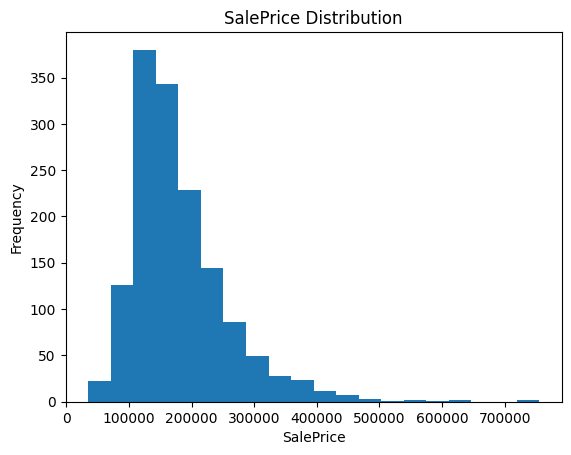

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['SalePrice'], bins=20)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')
plt.show()

House Size vs Price (Scater plot)

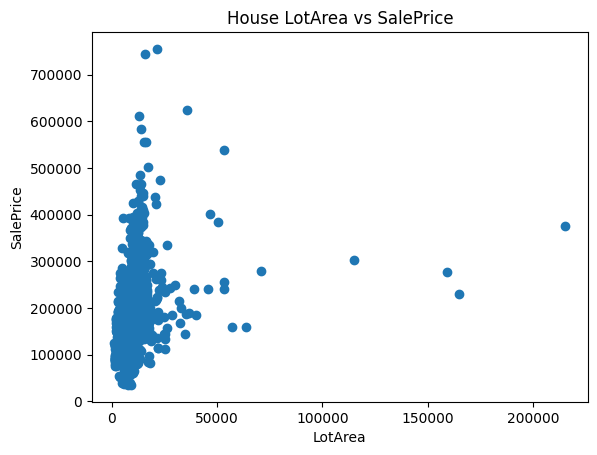

In [5]:
plt.scatter(df['LotArea'], df['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('House LotArea vs SalePrice')
plt.show()

Graph 3:Price by Location (Box plot)

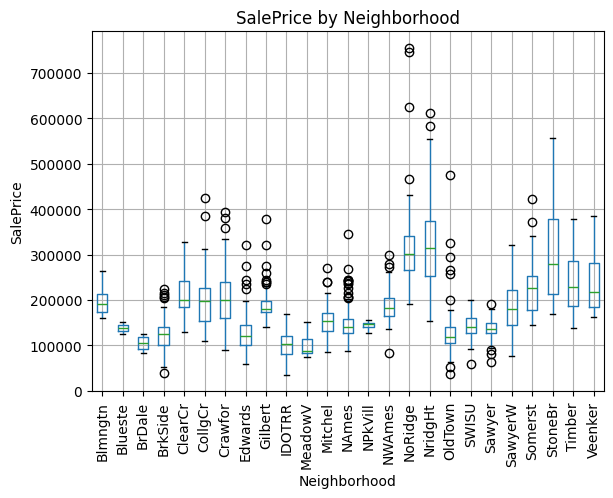

In [6]:
df.boxplot(column='SalePrice', by='Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.title('SalePrice by Neighborhood')
plt.suptitle('')
plt.xticks(rotation=90)
plt.show()

4.Property Age vs Price(Scatter plot)

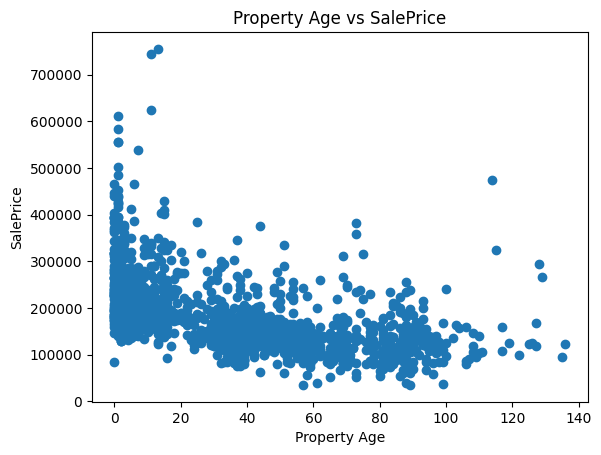

In [7]:
df['Age'] = df['YrSold'] - df['YearBuilt']
plt.scatter(df['Age'], df['SalePrice'])
plt.xlabel('Property Age')
plt.ylabel('SalePrice')
plt.title('Property Age vs SalePrice')
plt.show()

5.Machine learning workflow



*   Load the dataset
*   Handling missing value


*   Encode categorical variables

*   scale numerical features
*   split data into training and testing data

*  train Regression model











In [8]:
import pandas as pd
df=pd.read_csv("train.csv")
#df.head()#reading 1st 5 rows
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
#fill missing with "unknown"

df['PoolQC']=df['PoolQC'].fillna('unknown')
df['Fence']=df['Fence'].fillna('unknown')
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ...    Fence MiscFeatur

In [ ]:

#numerical columns-->fill with median
# Create 'Age' column as it was lost after reloading df
df['Age'] = df['YrSold'] - df['YearBuilt']
num_cols=["Age","LotArea"]
#with for loop
for col in num_cols:
  # Only fill if the column has missing values and is numerical
  if df[col].isnull().any() and pd.api.types.is_numeric_dtype(df[col]):
    df[col]=df[col].fillna(df[col].median())
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... MiscFeature MiscVal

In [ ]:
cat_features = ['Location', 'Condition']
num_features = ['Size', 'Age']

In [ ]:
#encoding
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Neighborhood_encoded']=le.fit_transform(df['Neighborhood'])
df['Condition1_encoded']=le.fit_transform(df['Condition1'])
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ...  Fence MiscFeature 

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Models used

Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#feutures and target
X=df[["Age","SaleCondition","Neighborhood","MoSold"]]
y=df["SalePrice"]

In [ ]:
model = LinearRegression()

# Identify categorical columns in X_train
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_train_encoded = pd.get_dummies(X_train.copy(), columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test.copy(), columns=categorical_cols, drop_first=True)


train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0

X_test_encoded = X_test_encoded[train_cols]


X_train_encoded.dropna(inplace=True)
y_train = y_train[X_train_encoded.index]

X_test_encoded.dropna(inplace=True)
y_test = y_test[X_test_encoded.index]

# Fit the model with the encoded data
model.fit(X_train_encoded, y_train)

LinearRegression()

In [ ]:
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... MiscFeature MiscVal

Decision Tree Regressor

In [ ]:
 import pandas as pd
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import accuracy_score


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.25,random_state=42
)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3)

# Identify categorical columns in X_train
categorical_cols = X_train.select_dtypes(include=['object']).columns


X_train_encoded = pd.get_dummies(X_train.copy(), columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test.copy(), columns=categorical_cols, drop_first=True)


train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0

X_test_encoded = X_test_encoded[train_col]
X_train_encoded.dropna(inplace=True)
y_train = y_train[X_train_encoded.index]

X_test_encoded.dropna(inplace=True)
y_test = y_test[X_test_encoded.index]

model.fit(X_train_encoded, y_train)

DecisionTreeRegressor(max_depth=3)

Random Forest Regresseor

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [16]:
data=load_iris()
X=data.data
y=data.target

In [17]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.25,random_state=42
)

In [18]:
 rf=RandomForestClassifier(
     n_estimators=100,
     bootstrap=True,
     random_state=42
 )
 rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred=rf.predict(X_test)
print("predictions:",y_pred)

predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [20]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 1.0


In [21]:
#get feature  importance
importances=rf.feature_importances_
features=data.feature_names

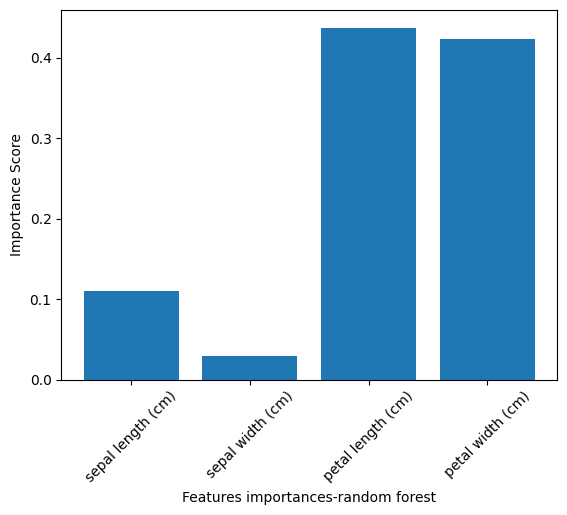

In [22]:
plt.figure()
plt.bar(features,importances)
plt.ylabel("Importance Score")
plt.xlabel("Features importances-random forest")
plt.xticks(rotation=45)
plt.show()

7.Model Evaluation

In [23]:
y_pred=rf.predict(X_test)
print("predictions:",y_pred)

predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [24]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 1.0


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 0.0
R2 Score: 1.0


In [28]:
#Identifing Price Influencing-Factors

importances  = rf.feature_importances_
features = data.feature_names

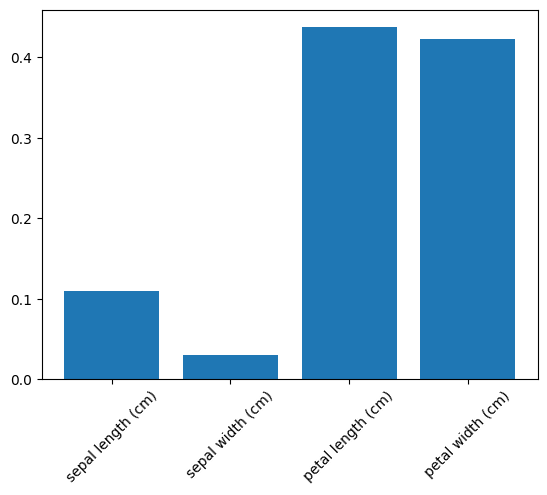

In [29]:
import matplotlib.pyplot as plt
plt.figure()
plt.bar(features,importances)
plt.xlabel=("Features Importance-Random Forest")
plt.ylabel=("Importances Score")
plt.xticks(rotation=45)
plt.show()

8.Identifying price influencing factors

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [ ]:
data=load_iris()
X=data.data
y=data.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.25,random_state=42
)

In [ ]:
 rf=RandomForestClassifier(
     n_estimators=100,
     bootstrap=True,
     random_state=42
 )
 rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=rf.predict(X_test)
print("predictions:",y_pred)

predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [ ]:
#get feature  importance
importances=rf.feature_importances_
features=data.feature_names

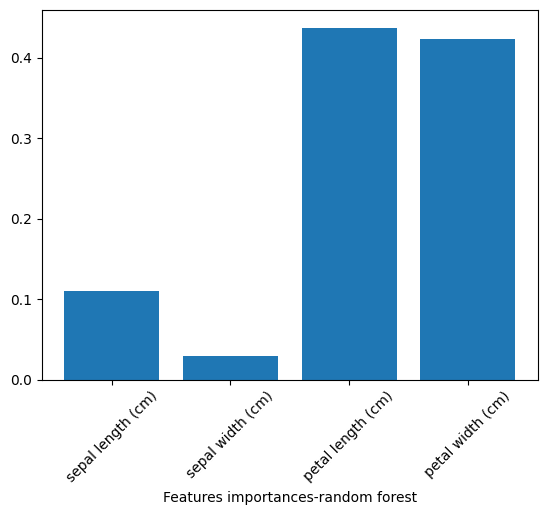

In [ ]:
plt.figure()
plt.bar(features,importances)
plt.ylabel=("Importance Score")
plt.xlabel("Features importances-random forest")
plt.xticks(rotation=45)
plt.show()


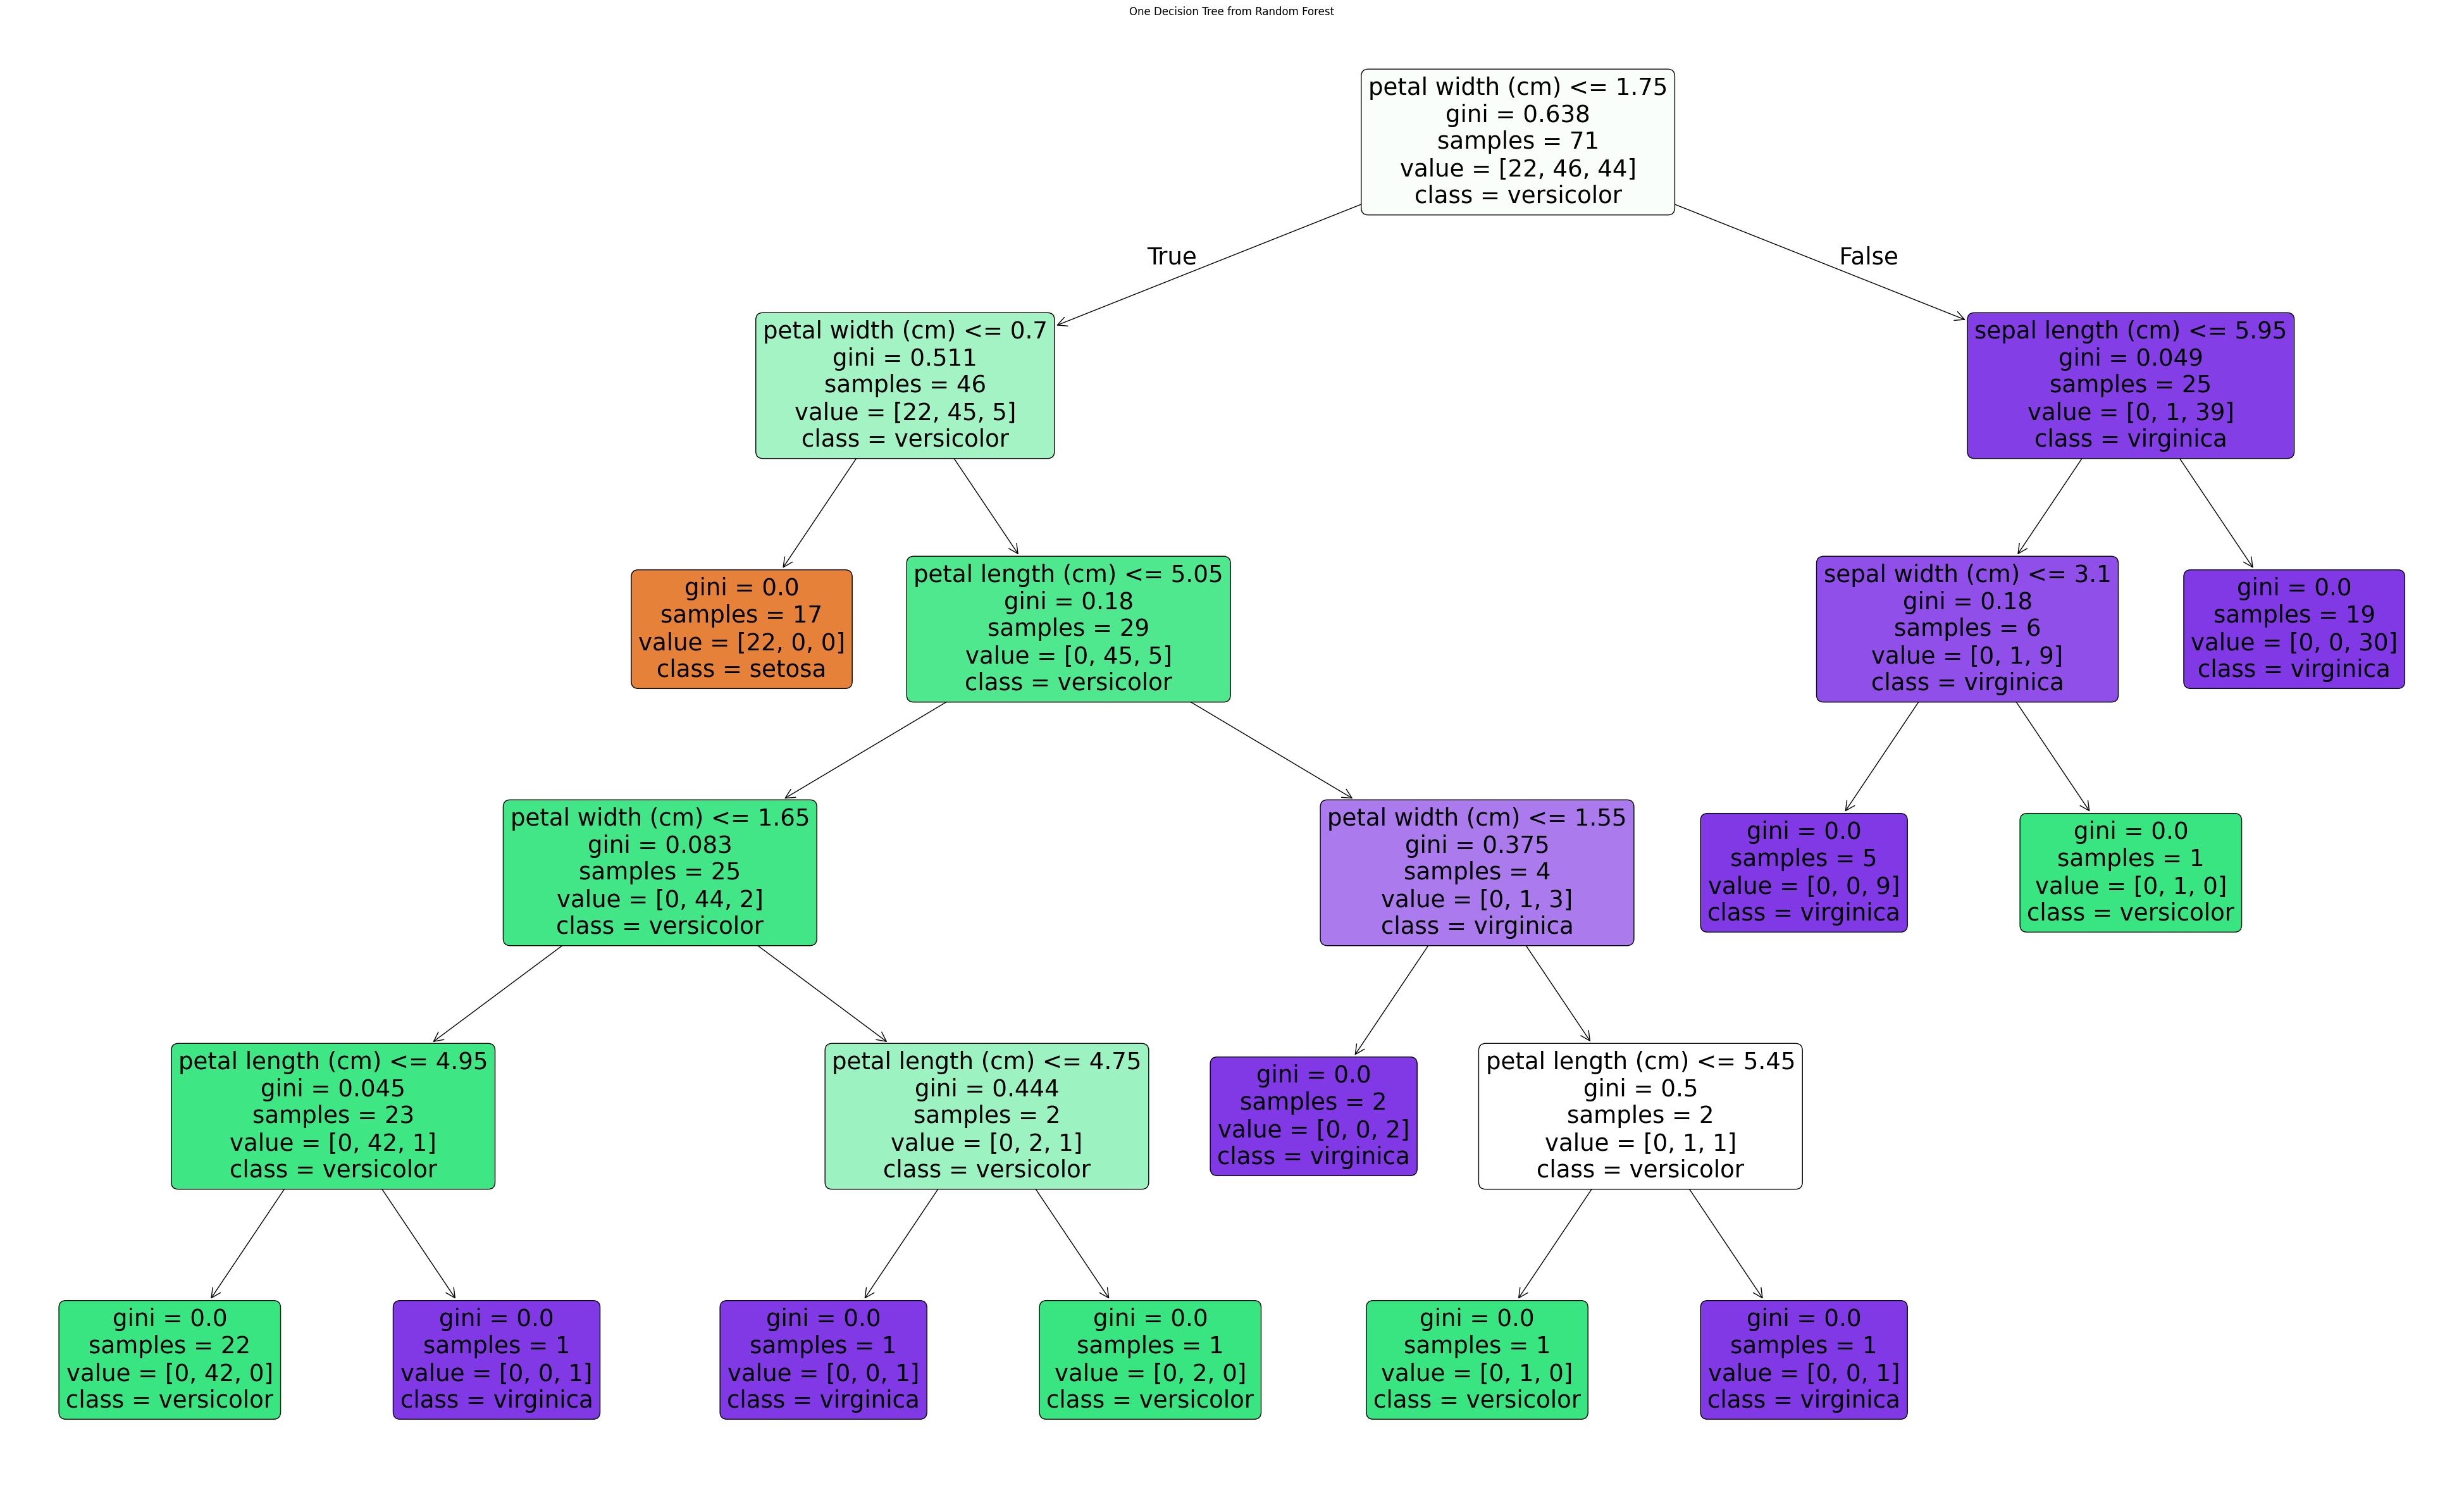

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,30))
plot_tree(
   rf.estimators_[0],
   feature_names=data.feature_names,
   class_names=data.target_names,
   filled=True,
   rounded=True
)
plt.title("One Decision Tree from Random Forest")
plt.show()